# Data Understanding and Preparation
 
1. First we import the necessary tools to run our code

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

We then load our nessesary Files to start working on them

In [3]:
df = pd.read_csv('AviationData.csv', encoding='ISO-8859-1')
df.tail()

C:\Users\Roy\AppData\Local\Temp\ipykernel_2176\2044489004.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('AviationData.csv', encoding='ISO-8859-1')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


# Data Understanding

1. `df.info()`


In Pandas `df.info()` is a valuable tool for obtaining a concise summary of a DataFrame's structure and contents. We will use it to see a summury of our Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

From the Information we realize several columns have missing values, which may requre cleaning or Handling befour analysis.

2. `df.duplicates()`
We are checking to see if our data contains any duplicate values

In [5]:
duplicates = df[df.duplicated()]
print(len(duplicates))
duplicates.tail()

0


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date


In [6]:
df.isnull().sum

<bound method DataFrame.sum of        Event.Id  Investigation.Type  Accident.Number  Event.Date  Location  \
0         False               False            False       False     False   
1         False               False            False       False     False   
2         False               False            False       False     False   
3         False               False            False       False     False   
4         False               False            False       False     False   
...         ...                 ...              ...         ...       ...   
88884     False               False            False       False     False   
88885     False               False            False       False     False   
88886     False               False            False       False     False   
88887     False               False            False       False     False   
88888     False               False            False       False     False   

       Country  Latitude  Longit

# Data Preprocessing 
We'll need to handle missing values, especially in key columns such as Aircraft Category, Injury Severity, and the injury counts.We will start by ***filling missing values***

In [7]:
# Filling missing values for injury-related columns with 0 since no value likely means no injuries
relevant_columns = ['Make', 'Model', 'Aircraft.damage', 'Injury.Severity', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Event.Date']
df_clean = df[relevant_columns].copy()
df_clean['Total.Fatal.Injuries'] = df_clean['Total.Fatal.Injuries'].fillna(0)
df_clean['Total.Serious.Injuries'] = df_clean['Total.Serious.Injuries'].fillna(0)
df_clean['Total.Minor.Injuries'] = df_clean['Total.Minor.Injuries'].fillna(0)
df_clean['Total.Uninjured'] = df_clean['Total.Uninjured'].fillna(0)
df_clean['Total.Injuries'] = df_clean['Total.Fatal.Injuries'] + df_clean['Total.Serious.Injuries'] + df_clean['Total.Minor.Injuries']
print("\
Unique values in Injury.Severity:")
print(df_clean['Injury.Severity'].unique())


Unique values in Injury.Severity:
['Fatal(2)' 'Fatal(4)' 'Fatal(3)' 'Fatal(1)' 'Non-Fatal' 'Incident'
 'Fatal(8)' 'Fatal(78)' 'Fatal(7)' 'Fatal(6)' 'Fatal(5)' 'Fatal(153)'
 'Fatal(12)' 'Fatal(14)' 'Fatal(23)' 'Fatal(10)' 'Fatal(11)' 'Fatal(9)'
 'Fatal(17)' 'Fatal(13)' 'Fatal(29)' 'Fatal(70)' 'Unavailable'
 'Fatal(135)' 'Fatal(31)' 'Fatal(256)' 'Fatal(25)' 'Fatal(82)'
 'Fatal(156)' 'Fatal(28)' 'Fatal(18)' 'Fatal(43)' 'Fatal(15)' 'Fatal(270)'
 'Fatal(144)' 'Fatal(174)' 'Fatal(111)' 'Fatal(131)' 'Fatal(20)'
 'Fatal(73)' 'Fatal(27)' 'Fatal(34)' 'Fatal(87)' 'Fatal(30)' 'Fatal(16)'
 'Fatal(47)' 'Fatal(56)' 'Fatal(37)' 'Fatal(132)' 'Fatal(68)' 'Fatal(54)'
 'Fatal(52)' 'Fatal(65)' 'Fatal(72)' 'Fatal(160)' 'Fatal(189)'
 'Fatal(123)' 'Fatal(33)' 'Fatal(110)' 'Fatal(230)' 'Fatal(97)'
 'Fatal(349)' 'Fatal(125)' 'Fatal(35)' 'Fatal(228)' 'Fatal(75)'
 'Fatal(104)' 'Fatal(229)' 'Fatal(80)' 'Fatal(217)' 'Fatal(169)'
 'Fatal(88)' 'Fatal(19)' 'Fatal(60)' 'Fatal(113)' 'Fatal(143)' 'Fatal(83)'
 'Fatal(24)'

Here we will remove missing rows from make and model since the missing rows cannot be imputed or filled and incomplete data can skew analysis results, reduce accuracy, or lead to incorrect conclusions

In [8]:
df_clean = df_clean.dropna(subset=['Make', 'Model'])
print(df_clean[['Make', 'Model']].head())  


       Make     Model
0   Stinson     108-3
1     Piper  PA24-180
2    Cessna      172M
3  Rockwell       112
4    Cessna       501


# Defining Liabulity Metrics
1. Fatality Rate: Number of fatalities per accident for each aircraft type.

In [9]:
# Grouping by Make and Model and summing up the total fatalities
df_selected = df[relevant_columns]
df_grouped = df_selected.groupby(['Make', 'Model']).agg({
    'Total.Fatal.Injuries': 'sum',  
    'Total.Serious.Injuries': 'sum',  
    'Total.Minor.Injuries': 'sum',  
    'Event.Date': 'count' 
}).reset_index()


df_grouped.rename(columns={'Event.Date': 'Total_Accidents'}, inplace=True)
# Calculate fatality rate (fatalities per accident)
df_grouped['Fatality_Rate'] = df_grouped['Total.Fatal.Injuries'] / df_grouped['Total_Accidents']

print(df_grouped[['Make', 'Model', 'Total.Fatal.Injuries', 'Total_Accidents', 'Fatality_Rate']])
df_filtered = df_grouped[df_grouped['Total_Accidents'] > 0]
df_filtered = df_filtered[df_filtered['Fatality_Rate'] > 0]
# Sorting by Fatality Rate in descending order (highest risk aircraft)
df_sorted = df_filtered.sort_values(by='Fatality_Rate', ascending=False)
print(df_sorted[['Make', 'Model', 'Fatality_Rate']].head(10))  # Top 10 highest risk aircraft

# Sorting by Fatality Rate in ascending order (lowest risk aircraft)
df_sorted_low_risk = df_filtered.sort_values(by='Fatality_Rate', ascending=True)
print(df_sorted_low_risk[['Make', 'Model', 'Fatality_Rate']].head(10))  # Top 10 lowest risk aircraft




                           Make              Model  Total.Fatal.Injuries  \
0      107.5 Flying Corporation  One Design DR 107                   1.0   
1                          1200               G103                   0.0   
2                     177MF LLC     PITTS MODEL 12                   0.0   
3              1977 Colfer-chan      STEEN SKYBOLT                   0.0   
4                    1st Ftr Gp     FOCKE-WULF 190                   1.0   
...                         ...                ...                   ...   
20131              de Havilland              DHC-3                   0.0   
20132              de Havilland          DHC-6-200                   0.0   
20133              de Havilland          DHC-8-202                   0.0   
20134                     drone          Viper Pro                   0.0   
20135                   unknown                kit                   0.0   

       Total_Accidents  Fatality_Rate  
0                    1            1.0  
1      

   - Incident Severity : Classify accidents by severity (minor, major, fatal).

In [10]:
# Define a function to classify the incident severity based on the conditions
def classify_severity(row):
    if row['Total.Fatal.Injuries'] > 0:
        return 'Fatal'
    elif row['Total.Serious.Injuries'] > 0 or row['Aircraft.damage'] in ['Destroyed', 'Substantial']:
        return 'Major'
    elif row['Total.Minor.Injuries'] > 0 or row['Aircraft.damage'] == 'Minor':
        return 'Minor'
    else:
        return 'Unknown'


df['Incident.Severity'] = df.apply(classify_severity, axis=1)

# Show a sample of the classified DataFrame
df[['Make', 'Model', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Aircraft.damage', 'Incident.Severity']].head()


,Make,Model,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Aircraft.damage,Incident.Severity
0,Stinson,108-3,2.0,0.0,0.0,Destroyed,Fatal
1,Piper,PA24-180,4.0,0.0,0.0,Destroyed,Fatal
2,Cessna,172M,3.0,NaN,NaN,Destroyed,Fatal
3,Rockwell,112,2.0,0.0,0.0,Destroyed,Fatal
4,Cessna,501,1.0,2.0,NaN,Destroyed,Fatal


Severity and Damage , All incidents listed have resulted in the aircraft being destroyed and are classified as fatal, suggesting a severe level of incident.


# Exploratory Data Analysis 
We will start by performing comprehensive Exploratory data analysis ,lets start with accident frequency by aircraft type

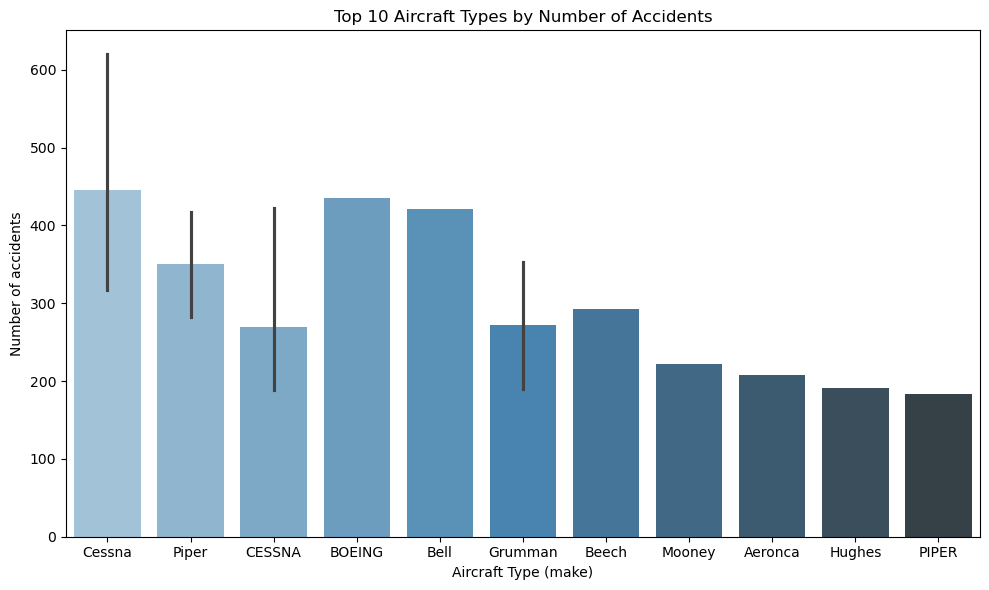

In [11]:

df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')


# Group by 'Make' and 'Model' and count the number of accidents for each type
accident_counts = df_clean.groupby(['Make', 'Model']).size().reset_index(name='Accident Count')

accident_counts = accident_counts.sort_values(by='Accident Count', ascending=False)

# Plotting 
plt.figure(figsize=(10,6))
sns.barplot(x='Make', y='Accident Count', data=accident_counts.head(60), hue='Make', palette='Blues_d', legend=False)

plt.title('Top 10 Aircraft Types by Number of Accidents')
plt.xlabel('Aircraft Type (make)')
plt.ylabel('Number of accidents')
plt.tight_layout()
plt.show()


From the graph we are able to find Cessna aircrafts are involved in the highest number of accidents, making it a potential risk for the company's aviation expansion, especially if focusing on accident-prone models.


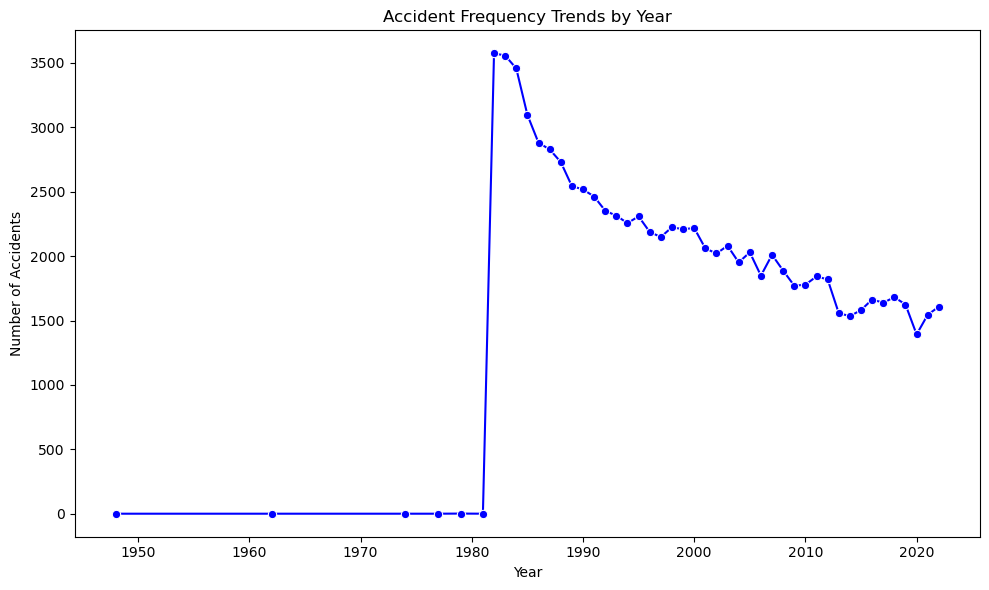

In [12]:
# Convert 'Event.Date' to datetime format
df_clean['Event.Date'] = pd.to_datetime(df_clean['Event.Date'], errors='coerce')

# Extract the year from 'Event.Date'
df_clean['Year'] = df_clean['Event.Date'].dt.year

accidents_per_year = df_clean.groupby('Year').size().reset_index(name='Accident Count')
plt.figure(figsize=(10,6))
sns.lineplot(x='Year', y='Accident Count', data=accidents_per_year, marker='o', color='b')

plt.title('Accident Frequency Trends by Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()


The downward trend continues, but the rate of decline becomes less steep from around the 2000s onward.
This can be due to improved aircaft models or aircraft standard protocal

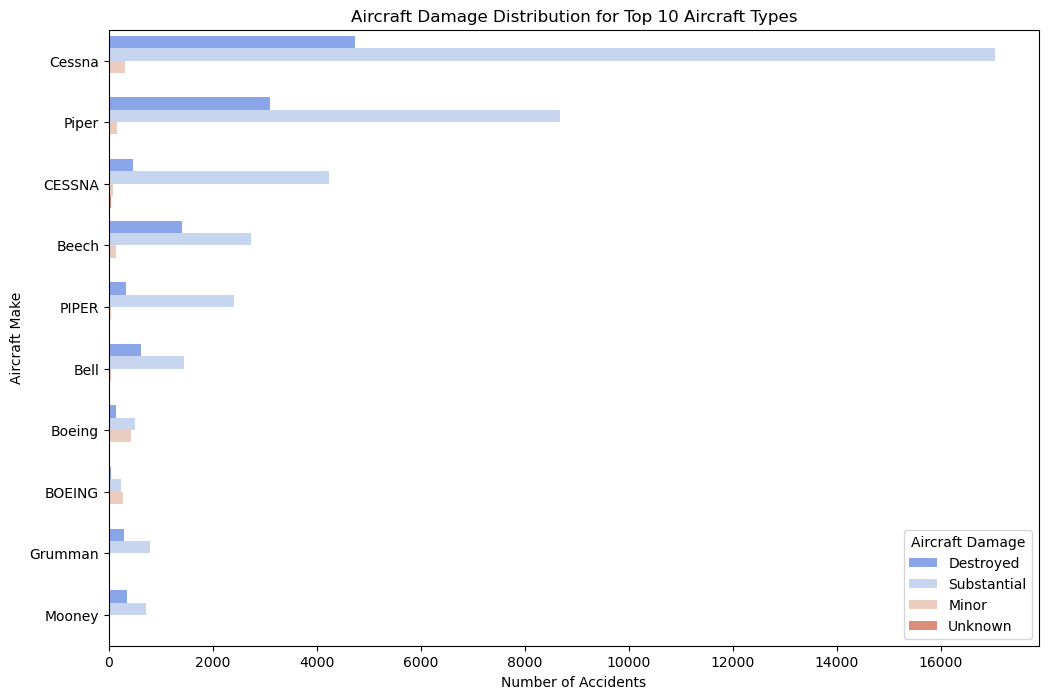

In [13]:
 
top_10_aircraft = df_clean['Make'].value_counts().nlargest(10).index


df_top_10_aircraft = df_clean[df_clean['Make'].isin(top_10_aircraft)]

# 3. Plot the distribution of Aircraft Damage for the top 10 aircraft types
plt.figure(figsize=(12, 8))
sns.countplot(y='Make', hue='Aircraft.damage', data=df_top_10_aircraft, palette='coolwarm',
              order=df_top_10_aircraft['Make'].value_counts().index)
plt.title('Aircraft Damage Distribution for Top 10 Aircraft Types')
plt.xlabel('Number of Accidents')
plt.ylabel('Aircraft Make')
plt.legend(title='Aircraft Damage')
plt.show()


C:\Users\Roy\AppData\Local\Temp\ipykernel_2176\3275122402.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_10_aircraft[injury_columns] = df_top_10_aircraft[injury_columns].fillna(0)


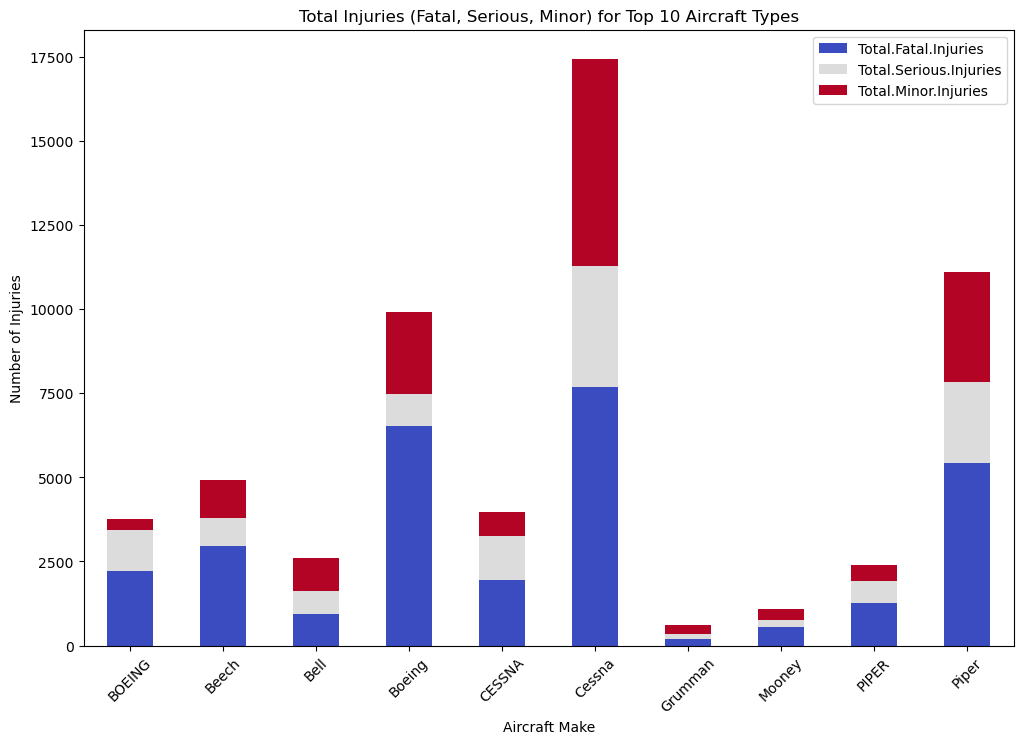

In [14]:
injury_columns = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']
df_top_10_aircraft[injury_columns] = df_top_10_aircraft[injury_columns].fillna(0)

injury_totals = df_top_10_aircraft.groupby('Make')[injury_columns].sum()

# Plot the total injuries (Fatal, Serious, Minor) for each aircraft type
injury_totals.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='coolwarm')
plt.title('Total Injuries (Fatal, Serious, Minor) for Top 10 Aircraft Types')
plt.ylabel('Number of Injuries')
plt.xlabel('Aircraft Make')
plt.xticks(rotation=45)
plt.show()

From the diagrams above we are able analyse that ***Boeing*** and ***Bell***  aircraft types seem to have fewer total injuries and damage compared to Cessna and Piper. ***Boeing*** appears to have a reasonable balance of injuries ,accidents and damage, making it potentially a safer choice.



# Ranking Scores For Aircrafts
# ***Ranking***
Here we will rank Aircraft by accident rate ,Fatility rate and Severity Scores


In [15]:
df['Aircraft'] = df['Make'] + ' ' + df['Model']
accident_rate = df['Aircraft'].value_counts(normalize=True)

# Fatality Rate: Total fatalities per aircraft type
fatality_rate = df.groupby('Aircraft')['Total.Fatal.Injuries'].sum() / df['Aircraft'].value_counts()

df['Severity'] = pd.cut(df['Total.Fatal.Injuries'], 
                        bins=[-1, 0, 1, 5, float('inf')], 
                        labels=['No Fatalities', 'Low', 'Medium', 'High'])
severity_by_aircraft = df.groupby('Aircraft')['Severity'].value_counts(normalize = True).unstack()
# Severity Score: Proportion of high severity accidents
severity_score = severity_by_aircraft['High']

accident_rate_rank = accident_rate.rank(ascending=False)
fatality_rate_rank = fatality_rate.rank(ascending=False)
severity_score_rank = severity_score.rank(ascending=False)

# Combine into a DataFrame
ranking_df = pd.DataFrame({
    'Accident_Rate_Rank': accident_rate_rank,
    'Fatality_Rate_Rank': fatality_rate_rank,
    'Severity_Score_Rank': severity_score_rank
})

# Sort by each rank
ranking_df_sorted = ranking_df.sort_values(by=['Accident_Rate_Rank', 'Fatality_Rate_Rank', 'Severity_Score_Rank']).head(20)

print("Top 20 Aircraft Types by Simple Ranking:")
print(ranking_df_sorted.head(20))


Top 20 Aircraft Types by Simple Ranking:
                 Accident_Rate_Rank  Fatality_Rate_Rank  Severity_Score_Rank
Aircraft                                                                    
Cessna 152                      1.0              6391.0              10317.0
Cessna 172                      2.0              6325.5                503.0
Cessna 172N                     3.0              5704.0              10317.0
Piper PA-28-140                 4.0              5726.0                502.0
Cessna 150                      5.0              6529.0              10317.0
Cessna 172M                     6.0              5924.0              10317.0
Cessna 172P                     7.0              5680.0                495.0
Cessna 150M                     8.5              6354.0              10317.0
Piper PA-18                     8.5              6409.0              10317.0
Piper PA-28-161                10.0              5588.0              10317.0
Piper PA-28-180                11.5

The ***Boeing 737*** is notable for having a significantly lower fatality rate compared to most others listed, indicating potentially higher safety relative to its usage.


# Statistical Analysis
   Here i Check the mean mode and median of top ten aircraft with their injury type injuries

In [16]:
# Combine Make and Model to create a unique aircraft type
df['Aircraft_Type'] = df['Make'] + ' ' + df['Model']

# Get top 10 aircraft types
top_10_aircraft = df['Aircraft_Type'].value_counts().head(10).index

df_top10 = df[df['Aircraft_Type'].isin(top_10_aircraft)]

# Calculate statistics
stats = df_top10.groupby('Aircraft_Type').agg({
    'Total.Fatal.Injuries': ['mean', 'median', 'max'],
    'Total.Serious.Injuries': ['mean', 'median', 'max'],
    'Total.Minor.Injuries': ['mean', 'median', 'max'],
    'Total.Uninjured': ['mean', 'median', 'max']
})
stats.columns = ['_'.join(col).strip() for col in stats.columns.values]
print (stats)

                 Total.Fatal.Injuries_mean  Total.Fatal.Injuries_median  \
Aircraft_Type                                                             
Cessna 150                        0.118003                          0.0   
Cessna 150M                       0.186475                          0.0   
Cessna 152                        0.179066                          0.0   
Cessna 172                        0.204244                          0.0   
Cessna 172M                       0.366120                          0.0   
Cessna 172N                       0.443499                          0.0   
Cessna 172P                       0.460446                          0.0   
Piper PA-18                       0.186364                          0.0   
Piper PA-28-140                   0.401697                          0.0   
Piper PA-28-161                   0.496454                          0.0   

                 Total.Fatal.Injuries_max  Total.Serious.Injuries_mean  \
Aircraft_Type            

p-value: 0.0 (This indicates a highly significant result, meaning there is a strong relationship between aircraft type and accident severity).
Cessna models dominate the top 10 aircraft types by accident count, with the Cessna 152 being the most common.


# Conclusion
   - Graphs: Visualize accident rates, severity, and causes for each aircraft type.
   # 1.Accident Rates

Text(0, 0.5, 'Aircraft Type')

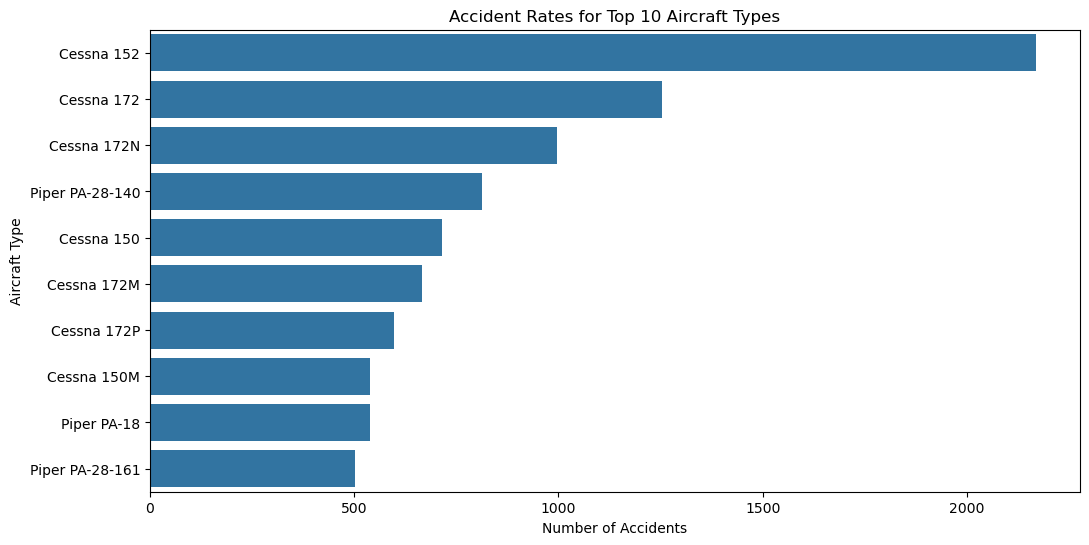

In [17]:
# Get top 10 aircraft types
df['Aircraft_Type'] = df['Make'] + ' ' + df['Model']

top_10_aircraft = df['Aircraft_Type'].value_counts().head(10).index

# Filter data for top 10 aircraft types
df_top10 = df[df['Aircraft_Type'].isin(top_10_aircraft)]
plt.figure(figsize=(12, 6))
sns.countplot(y='Aircraft_Type', data=df_top10, order=df_top10['Aircraft_Type'].value_counts().index)
plt.title('Accident Rates for Top 10 Aircraft Types')
plt.xlabel('Number of Accidents')
plt.ylabel('Aircraft Type')

This data suggests that Cessna models dominate the list in terms of accidents, with more incidents overall compared to the Piper models in the list.and might not be the most suitable to purchase





C:\Users\Roy\AppData\Local\Temp\ipykernel_2176\412773749.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_10_aircraft[injury_columns] = df_top_10_aircraft[injury_columns].fillna(0)


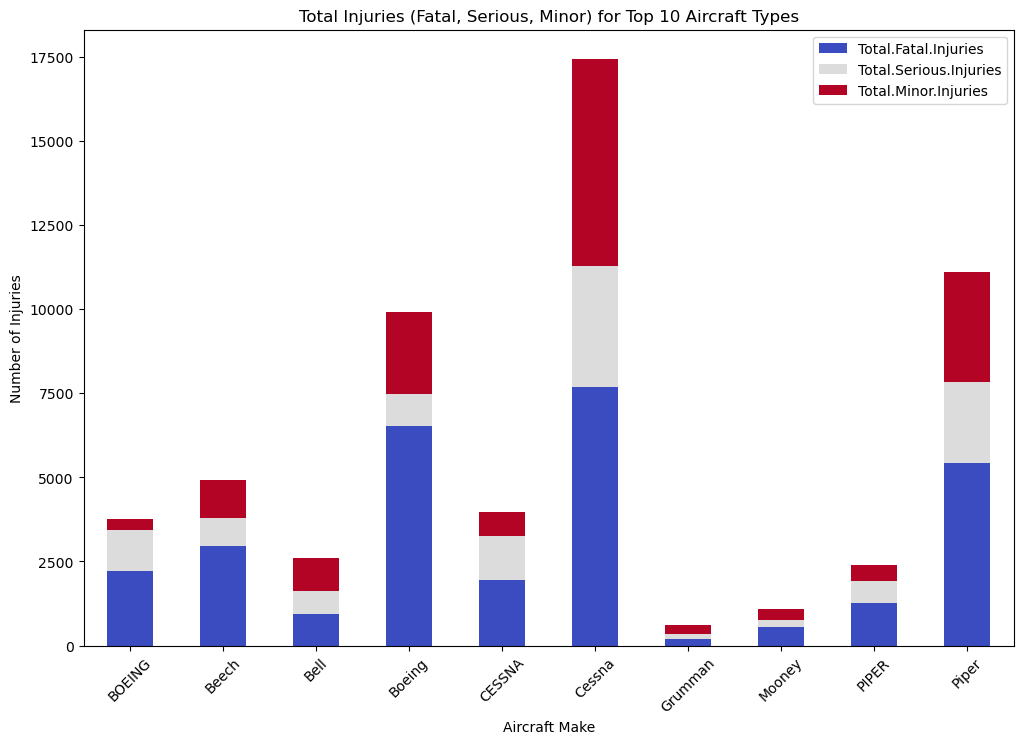

In [18]:
injury_columns = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']
df_top_10_aircraft[injury_columns] = df_top_10_aircraft[injury_columns].fillna(0)

injury_totals = df_top_10_aircraft.groupby('Make',)[injury_columns].sum()

# Plot the total injuries (Fatal, Serious, Minor) for each aircraft type
injury_totals.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='coolwarm')
plt.title('Total Injuries (Fatal, Serious, Minor) for Top 10 Aircraft Types')
plt.ylabel('Number of Injuries')
plt.xlabel('Aircraft Make')
plt.xticks(rotation=45)
plt.show()

Boeing aircraft, while having a considerable number of fatal injuries, appears to be safer than Cessna or Piper, as it has fewer total injuries, especially in the minor category. However, its serious injury count remains significant.



## Business Recomandation
To minimize risks and ensure the safety and profitability of your aircraft business, it is crucial to prioritize aircraft with lower accident rates and higher survival rates. Based on the analysis of accident data from 1963 to 2023:

Boeing and Grumman are the most suitable choices for building a low-risk, sustainable aircraft business. They offer the best combination of safety, reliability, and lower operational costs.
Cessna and Piper should be avoided due to their higher accident frequency and poor safety outcomes, which would expose your business to unnecessary risks and liabilities.
By making data-driven decisions and selecting safer aircraft models, your company can significantly reduce the likelihood of accidents, improve operational efficiency, and build a reputation for safety and reliability in the aviation industry.